# Firing rate figure plots
-----

Plot paired plots for mean firing rate changes pre- and post- stimulation periods. 

The following figures can be found here: 
> 1. Figure 4c,g
> 2. Figure 4d,h

**load libraries**

In [1]:
import os
import numpy as np
import pathlib
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import style

os.chdir('../..')
from fused_org_ephys import (plot_pairs, save_fig)

!pwd

/Users/michael.zabolocki/Desktop/code/fusion_models_ephys


**load mr dataframe**

Load mua spike analysis dataframes for all organoid recordings. See [here](https://github.com/mzabolocki/miscos_ephys/blob/main/analysis/mua_spikes/mua_spikes.ipynb) for more details. 

In [2]:
fpath = pathlib.PurePath('Data', 'ephys_baseline.xlsx')
df = pd.read_excel(fpath, index_col='file') 
df.head(5)

,Unnamed: 0,expID,exp_day,file.1,EB,organoid,ages,optostim_region,probe_region,chans,...,mfr,mfr_opto,mfr_activechans,mfr_opto_activechans,mfr_perchan,mfr_opto_perchan,mfr_activechans_perchan,mfr_opto_activechans_perchan,responding_activechans,total_activechans
file,,,,,,,,,,,,,,,,,,,,,
DR001_2021-12-13_17-00-32_64P,0,DR001,2021-12-13,DR001_2021-12-13_17-00-32_64P,2021-07-26,H9_WT,140,vmid,cortical,[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...,...,0.098139,0.510528,0.134458,0.752333,[0.04333333 0.01333333 0.025 0. 0...,[3.83333333e-02 3.83333333e-02 6.36666667e-01 ...,[0.025 0. 0. 0. 0...,[0.63666667 1.31333333 0.39833333 1.10333333 0...,35,40
DR012_2022-11-24_17-07-00_64P,0,DR0012,2022-11-24,DR012_2022-11-24_17-07-00_64P,2022-06-24,H9_WT,153,vmid,striatum,[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...,...,0.770269,1.410000,0.770269,1.410000,[1.45 1.65 2.07666667 2.21 2...,[4.84333333 4.58166667 5.38166667 3.71333333 2...,[1.45 1.65 2.07666667 2.21 2...,[4.84333333 4.58166667 5.38166667 3.71333333 2...,39,62
DR021_2023-05-15_19-04-01,0,DR0021,2023-05-15,DR021_2023-05-15_19-04-01,2022-11-25,H9_WT,171,vmid,cortical,[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...,...,0.161172,0.162656,0.251441,0.258874,[0.615 0.32833333 0.66 0.045 0...,[1.02 0.33333333 0.58 0.04333333 0...,[0.615 0.32833333 0.66 0.44666667 0...,[1.02 0.33333333 0.58 0.46333333 0...,11,37
DR023_2023-05-15_23-07-05,0,DR0023,2023-05-15,DR023_2023-05-15_23-07-05,2022-11-25,H9_WT,171,vmid,cortical,[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...,...,0.850026,4.094089,0.850026,4.094089,[4.88333333e-01 7.73333333e-01 1.15500000e+00 ...,[ 3.145 3.76166667 3.27166667 0.573333...,[4.88333333e-01 7.73333333e-01 1.15500000e+00 ...,[ 3.145 3.76166667 3.27166667 0.573333...,60,64
DR003_2021-12-14_13-40-33_64P,0,DR003,2021-12-14,DR003_2021-12-14_13-40-33_64P,2021-07-26,H9_WT,141,vmid,striatum,[ 0 1 2 3 4 5 6 8 9 10 11 12 13 14 15 ...,...,0.072281,0.088538,0.125526,0.229035,[0.00333333 0.00666667 0.00166667 0.00333333 0...,[0.03166667 0.03333333 0.01 0.025 0...,[0.06 0.03833333 0.07833333 0.40166667 0...,[0.10666667 0.13166667 0.35333333 0.61166667 0...,14,19


Organoids with <= 5 active channels were removed from subsequent analyses. This was to avoid biasing results.

In [3]:
print(f'orgs removed: {len(df) - len(df[df.responding_activechans > 5])}')

df = df[df.responding_activechans > 5]
df.head(5)

orgs removed: 1


,Unnamed: 0,expID,exp_day,file.1,EB,organoid,ages,optostim_region,probe_region,chans,...,mfr,mfr_opto,mfr_activechans,mfr_opto_activechans,mfr_perchan,mfr_opto_perchan,mfr_activechans_perchan,mfr_opto_activechans_perchan,responding_activechans,total_activechans
file,,,,,,,,,,,,,,,,,,,,,
DR001_2021-12-13_17-00-32_64P,0,DR001,2021-12-13,DR001_2021-12-13_17-00-32_64P,2021-07-26,H9_WT,140,vmid,cortical,[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...,...,0.098139,0.510528,0.134458,0.752333,[0.04333333 0.01333333 0.025 0. 0...,[3.83333333e-02 3.83333333e-02 6.36666667e-01 ...,[0.025 0. 0. 0. 0...,[0.63666667 1.31333333 0.39833333 1.10333333 0...,35,40
DR012_2022-11-24_17-07-00_64P,0,DR0012,2022-11-24,DR012_2022-11-24_17-07-00_64P,2022-06-24,H9_WT,153,vmid,striatum,[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...,...,0.770269,1.410000,0.770269,1.410000,[1.45 1.65 2.07666667 2.21 2...,[4.84333333 4.58166667 5.38166667 3.71333333 2...,[1.45 1.65 2.07666667 2.21 2...,[4.84333333 4.58166667 5.38166667 3.71333333 2...,39,62
DR021_2023-05-15_19-04-01,0,DR0021,2023-05-15,DR021_2023-05-15_19-04-01,2022-11-25,H9_WT,171,vmid,cortical,[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...,...,0.161172,0.162656,0.251441,0.258874,[0.615 0.32833333 0.66 0.045 0...,[1.02 0.33333333 0.58 0.04333333 0...,[0.615 0.32833333 0.66 0.44666667 0...,[1.02 0.33333333 0.58 0.46333333 0...,11,37
DR023_2023-05-15_23-07-05,0,DR0023,2023-05-15,DR023_2023-05-15_23-07-05,2022-11-25,H9_WT,171,vmid,cortical,[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...,...,0.850026,4.094089,0.850026,4.094089,[4.88333333e-01 7.73333333e-01 1.15500000e+00 ...,[ 3.145 3.76166667 3.27166667 0.573333...,[4.88333333e-01 7.73333333e-01 1.15500000e+00 ...,[ 3.145 3.76166667 3.27166667 0.573333...,60,64
DR003_2021-12-14_13-40-33_64P,0,DR003,2021-12-14,DR003_2021-12-14_13-40-33_64P,2021-07-26,H9_WT,141,vmid,striatum,[ 0 1 2 3 4 5 6 8 9 10 11 12 13 14 15 ...,...,0.072281,0.088538,0.125526,0.229035,[0.00333333 0.00666667 0.00166667 0.00333333 0...,[0.03166667 0.03333333 0.01 0.025 0...,[0.06 0.03833333 0.07833333 0.40166667 0...,[0.10666667 0.13166667 0.35333333 0.61166667 0...,14,19


Sort df by fused organoid region. 

In [4]:
df_cortical = df[df.probe_region == 'cortical']
df_str = df[df.probe_region == 'striatum']

print(f'total number of cortical organoids: {len(df_cortical)}')
print(f'total number of striatal organoids: {len(df_str)}')

total number of cortical organoids: 8
total number of striatal organoids: 7


## **Figure 4c,g:** paired mean firing plots pre- and post- optogenetic stimulations
---

Plot the changes in firing rates for str-vmid and cortical-vmid recordings in fused organoids.

Set figure plot colors. 

In [5]:
colors = [['black', '#BFBC5B'], ['black', '#B699C7']]
pie_colors = [['lightgray', '#BFBC5B'], ['lightgray', '#B699C7']]

Set save folder for main figure outputs. 

In [6]:
save_folder = 'figures/main_figure/'

Plot fused organoid firing rate changes. 

Baseline = 1.0000 +/- 0.2532, n = 7
Stimulation = 3.0820 +/- 0.8048, n = 7
P = 0.01562, Wilcoxon signed-rank test (two-sided W test)

Baseline = 1.0000 +/- 0.2750, n = 8
Stimulation = 3.4340 +/- 1.2454, n = 8
P = 0.03906, Wilcoxon signed-rank test (two-sided W test)

The new directory is created for figures/main_figure/
saving to: figures/main_figure/str_cortical_meanfiringrates.pdf
saved


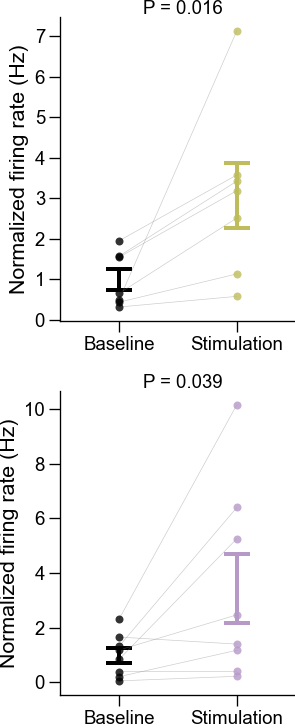

In [7]:
style.use('fused_org_ephys/plots/paper.mplstyle')
fig, ax = plt.subplots(2, 1, figsize=(3.5, 8))

for count, df in enumerate([df_str, df_cortical]): 

    # pair plots
    ax[count], stats = plot_pairs(df.mfr_activechans/(df.mfr_activechans).mean(),
                                  df.mfr_opto_activechans/(df.mfr_activechans).mean(),
                                  labels = ['Baseline', 'Stimulation'],
                                  colors = colors[count], ax = ax[count])
    
    # adjust ylabels
    ax[count].set_ylabel('Normalized firing rate (Hz)')
    _, ymax = ax[count].get_ylim()
    
    # statistics
    pval = stats['P-value']
    ax[count].text(0.2,ymax+ymax*0.01, f'P = {pval:.3f}', fontsize=14)

# save out
fig.tight_layout()
save_fig(fig, 'str_cortical_meanfiringrates', file_extension='.pdf', save_folder = save_folder)

## **Figure 4d,h:** Active channels responding to stimulation (%)
----
Plot the responding channels to optogenetic stimulus as a proportion of all active channels in a pie graph format.

An active channel is considered active if the change from pre- and post- stimulation is >= 10% normalized firing rate.  

First, calculate the proportion of responding and not responding channels. 

In [8]:
# responding
responding_chans = [(df_str.responding_activechans.sum()/df_str.total_activechans.sum())*100,
                    (df_cortical.responding_activechans.sum()/df_cortical.total_activechans.sum())*100]

# not responding
not_responding_chans = [100 - x for x in responding_chans]

Sumarise n-values for each recording type. 

In [9]:
n_vals = [df_str.total_activechans.sum(), df_cortical.total_activechans.sum()]

Plot resultant pie-graphs. 

The directory already exists for figures/main_figure/
saving to: figures/main_figure/responding_striatum_cortical.pdf
saved


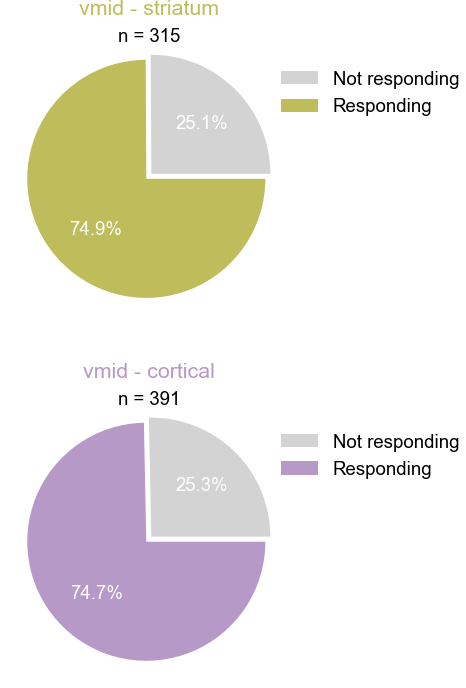

In [10]:
style.use('fused_org_ephys/plots/paper.mplstyle')
fig, ax = plt.subplots(2, 1, figsize=(4., 9.))

# plot titles
titles = ['vmid - striatum', 'vmid - cortical']

count = 0
for responding, not_responding, n_val in zip(responding_chans, not_responding_chans, n_vals): 
    
    count += 1
    
    # pie plots
    patches, texts, autotexts = ax[count-1].pie(np.array([not_responding, responding]),
                                                colors = pie_colors[count-1], autopct='%1.1f%%',
                                                explode=(0.03, 0.03), labeldistance=1.15)
    
    # change to white text color 
    [autotext.set_color('white') for autotext in autotexts]

    # adjust labels
    labels = ["Not responding", "Responding"]
    ax[count-1].legend(patches, labels, loc="right", bbox_to_anchor=[1.6, 0.78]) # legend
    ax[count-1].set_title(titles[count-1], color = pie_colors[count-1][1], pad = 10)
    ax[count-1].text(0.5,0.97, f'n = {n_val}', horizontalalignment='center', verticalalignment='center', transform=ax[count-1].transAxes)

# save out
save_fig(fig, 'responding_striatum_cortical', file_extension='.pdf', save_folder = save_folder)